store--->:  no
entered True line
Year 2013: 12271
Year 2014: 43796
Year 2015: 39362
Montag: 11099
Dienstag: 12309
Mittwoch: 13060
Donnerstag: 13113
Freitag: 15680
Samstag: 20831
Sonntag: 9337
MonthJanTotal: 8038
MonthFebTotal: 6983
MonthMarTotal: 8142
MonthAprTotal: 7264
MonthMayTotal: 7927
MonthJunTotal: 6936
MonthJulTotal: 7314
MonthAugTotal: 7535
MonthSepTotal: 6932
MonthOctTotal: 11742
MonthNovTotal: 9410
MonthDecTotal: 7206
CALAMARI Inventory: 3232
FISCH Inventory: 3562
GARNELEN Inventory: 7615
HAEHNCHEN Inventory: 23101
KOEFTE Inventory: 16788
LAMM Inventory: 24046
STEAK Inventory: 17085
TOTAL_FISCHPROD Inventory: 14409
TOTAL_FLEISCH Inventory: 81020


,Sr.No.,DEMAND_DATE,Montag,Dienstag,Mittwoch,Donnerstag,Freitag,Samstag,Sonntag,MONTH_JAN,MONTH_FEB,MONTH_MAR,MONTH_APR,MONTH_MAY,MONTH_JUN,MONTH_JUL,MONTH_AUG,MONTH_SEP,MONTH_OCT,MONTH_NOV,MONTH_DEC,YEAR_2013,YEAR_2014,YEAR_2015,CALAMARI,FISCH,GARNELEN,HAEHNCHEN,KOEFTE,LAMM,STEAK,TOTAL_FISCHPROD,TOTAL_FLEISCH,TOTAL,CALAMARI_DEMAND_T1,CALAMARI_DEMAND_T2,CALAMARI_DEMAND_T3,CALAMARI_DEMAND_T4,CALAMARI_DEMAND_T5,CALAMARI_DEMAND_T6,CALAMARI_DEMAND_T7,FISCH_DEMAND_T1,FISCH_DEMAND_T2,FISCH_DEMAND_T3,FISCH_DEMAND_T4,FISCH_DEMAND_T5,FISCH_DEMAND_T6,FISCH_DEMAND_T7,GARNELEN_DEMAND_T1,GARNELEN_DEMAND_T2,GARNELEN_DEMAND_T3,GARNELEN_DEMAND_T4,GARNELEN_DEMAND_T5,GARNELEN_DEMAND_T6,GARNELEN_DEMAND_T7,HAEHNCHEN_DEMAND_T1,HAEHNCHEN_DEMAND_T2,HAEHNCHEN_DEMAND_T3,HAEHNCHEN_DEMAND_T4,HAEHNCHEN_DEMAND_T5,HAEHNCHEN_DEMAND_T6,HAEHNCHEN_DEMAND_T7,KOEFTE_DEMAND_T1,KOEFTE_DEMAND_T2,KOEFTE_DEMAND_T3,KOEFTE_DEMAND_T4,KOEFTE_DEMAND_T5,KOEFTE_DEMAND_T6,KOEFTE_DEMAND_T7,LAMM_DEMAND_T1,LAMM_DEMAND_T2,LAMM_DEMAND_T3,LAMM_DEMAND_T4,LAMM_DEMAND_T5,LAMM_DEMAND_T6,LAMM_DEMAND_T7,STEAK_DEMAND_T1,STEAK_DEMAND_T2,STEAK_DEMAND_T3,STEAK_DEMAND_T4,STEAK_DEMAND_T5,STEAK_DEMAND_T6,STEAK_DEMAND_T7,TOTAL_FISCHPROD_DEMAND_T1,TOTAL_FISCHPROD_DEMAND_T2,TOTAL_FISCHPROD_DEMAND_T3,TOTAL_FISCHPROD_DEMAND_T4,TOTAL_FISCHPROD_DEMAND_T5,TOTAL_FISCHPROD_DEMAND_T6,TOTAL_FISCHPROD_DEMAND_T7,TOTAL_FLEISCH_DEMAND_T1,TOTAL_FLEISCH_DEMAND_T2,TOTAL_FLEISCH_DEMAND_T3,TOTAL_FLEISCH_DEMAND_T4,TOTAL_FLEISCH_DEMAND_T5,TOTAL_FLEISCH_DEMAND_T6,TOTAL_FLEISCH_DEMAND_T7,TOTAL_DEMAND_T1,TOTAL_DEMAND_T2,TOTAL_DEMAND_T3,TOTAL_DEMAND_T4,TOTAL_DEMAND_T5,TOTAL_DEMAND_T6,TOTAL_DEMAND_T7,CALAMARI_CUM_DEMAND_T2,CALAMARI_CUM_DEMAND_T3,CALAMARI_CUM_DEMAND_T4,CALAMARI_CUM_DEMAND_T5,CALAMARI_CUM_DEMAND_T6,CALAMARI_CUM_DEMAND_T7,FISCH_CUM_DEMAND_T2,FISCH_CUM_DEMAND_T3,FISCH_CUM_DEMAND_T4,FISCH_CUM_DEMAND_T5,FISCH_CUM_DEMAND_T6,FISCH_CUM_DEMAND_T7,GARNELEN_CUM_DEMAND_T2,GARNELEN_CUM_DEMAND_T3,GARNELEN_CUM_DEMAND_T4,GARNELEN_CUM_DEMAND_T5,GARNELEN_CUM_DEMAND_T6,GARNELEN_CUM_DEMAND_T7,HAEHNCHEN_CUM_DEMAND_T2,HAEHNCHEN_CUM_DEMAND_T3,HAEHNCHEN_CUM_DEMAND_T4,HAEHNCHEN_CUM_DEMAND_T5,HAEHNCHEN_CUM_DEMAND_T6,HAEHNCHEN_CUM_DEMAND_T7,KOEFTE_CUM_DEMAND_T2,KOEFTE_CUM_DEMAND_T3,KOEFTE_CUM_DEMAND_T4,KOEFTE_CUM_DEMAND_T5,KOEFTE_CUM_DEMAND_T6,KOEFTE_CUM_DEMAND_T7,LAMM_CUM_DEMAND_T2,LAMM_CUM_DEMAND_T3,LAMM_CUM_DEMAND_T4,LAMM_CUM_DEMAND_T5,LAMM_CUM_DEMAND_T6,LAMM_CUM_DEMAND_T7,STEAK_CUM_DEMAND_T2,STEAK_CUM_DEMAND_T3,STEAK_CUM_DEMAND_T4,STEAK_CUM_DEMAND_T5,STEAK_CUM_DEMAND_T6,STEAK_CUM_DEMAND_T7,TOTAL_FISCHPROD_CUM_DEMAND_T2,TOTAL_FISCHPROD_CUM_DEMAND_T3,TOTAL_FISCHPROD_CUM_DEMAND_T4,TOTAL_FISCHPROD_CUM_DEMAND_T5,TOTAL_FISCHPROD_CUM_DEMAND_T6,TOTAL_FISCHPROD_CUM_DEMAND_T7,TOTAL_FLEISCH_CUM_DEMAND_T2,TOTAL_FLEISCH_CUM_DEMAND_T3,TOTAL_FLEISCH_CUM_DEMAND_T4,TOTAL_FLEISCH_CUM_DEMAND_T5,TOTAL_FLEISCH_CUM_DEMAND_T6,TOTAL_FLEISCH_CUM_DEMAND_T7,TOTAL_CUM_DEMAND_T2,TOTAL_CUM_DEMAND_T3,TOTAL_CUM_DEMAND_T4,TOTAL_CUM_DEMAND_T5,TOTAL_CUM_DEMAND_T6,TOTAL_CUM_DEMAND_T7,CALAMARI_HML_DEMAND_T7,FISCH_HML_DEMAND_T7,GARNELEN_HML_DEMAND_T7,HAEHNCHEN_HML_DEMAND_T7,KOEFTE_HML_DEMAND_T7,LAMM_HML_DEMAND_T7,STEAK_HML_DEMAND_T7,TOTAL_FISCHPROD_HML_DEMAND_T7,TOTAL_FLEISCH_HML_DEMAND_T7,TOTAL_HML_DEMAND_T7,CALAMARI_NO_DAYS_ABOVE_7D_MEAN,FISCH_NO_DAYS_ABOVE_7D_MEAN,GARNELEN_NO_DAYS_ABOVE_7D_MEAN,HAEHNCHEN_NO_DAYS_ABOVE_7D_MEAN,KOEFTE_NO_DAYS_ABOVE_7D_MEAN,LAMM_NO_DAYS_ABOVE_7D_MEAN,STEAK_NO_DAYS_ABOVE_7D_MEAN,TOTAL_FISCHPROD_NO_DAYS_ABOVE_7D_MEAN,TOTAL_FLEISCH_NO_DAYS_ABOVE_7D_MEAN,TOTAL_NO_DAYS_ABOVE_7D_MEAN,CALAMARI_NO_DAYS_BELOW_7D_MEAN,FISCH_NO_DAYS_BELOW_7D_MEAN,GARNELEN_NO_DAYS_BELOW_7D_MEAN,HAEHNCHEN_NO_DAYS_BELOW_7D_MEAN,KOEFTE_NO_DAYS_BELOW_7D_MEAN,LAMM_NO_DAYS_BELOW_7D_MEAN,STEAK_NO_DAYS_BELOW_7D_MEAN,TOTAL_FISCHPROD_NO_DAYS_BELOW_7D_MEAN,TOTAL_FLEISCH_NO_DAYS_BELOW_7D_MEAN,TOTAL_NO_DAYS_BELOW_7D_MEAN,CALAMARI_MEAN_SAME_WDAY_DEMANDS_W2,CALAMARI_MEAN_SAME_WDAY_DEMANDS_W3,CALAMARI_MEAN_SAME_WDAY_DEMANDS_W4,FISCH_MEAN_SAME_WDAY_DEMANDS_W2,FISCH_MEAN_SAME_W

monday's demand:  161
tuesday's demand:  161
wednesday's demand:  161
thursday's demand:  160
friday's demand:  160
saturday's demand:  162
scaled demand--->
monday's demand:  16
tuesday's demand:  16
wednesday's demand:  16
thursday's demand:  16
friday's demand:  16
saturday's demand:  16


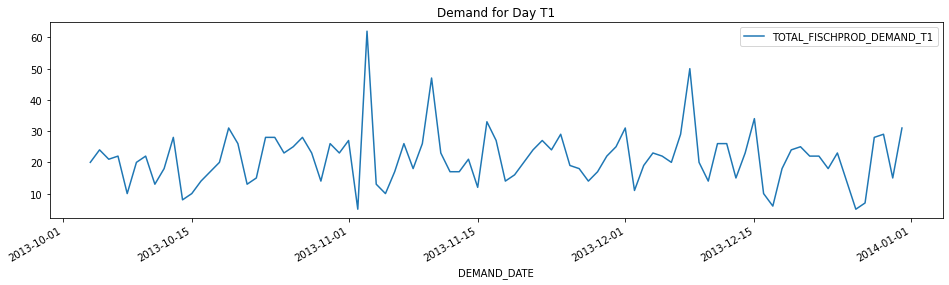

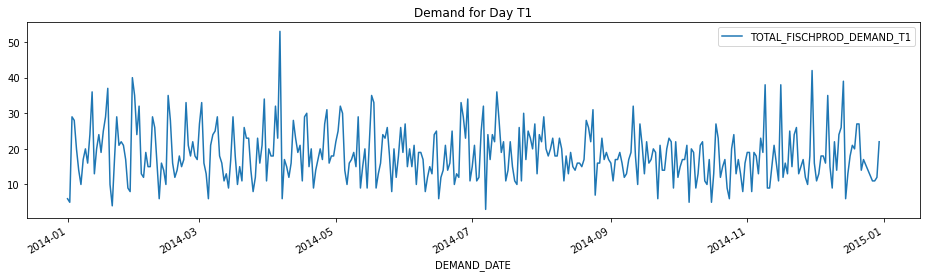

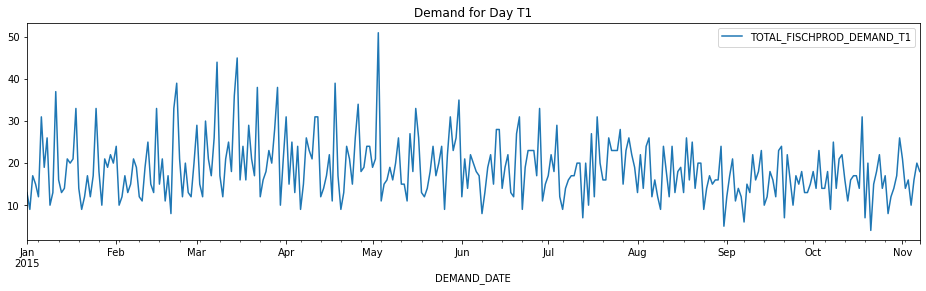

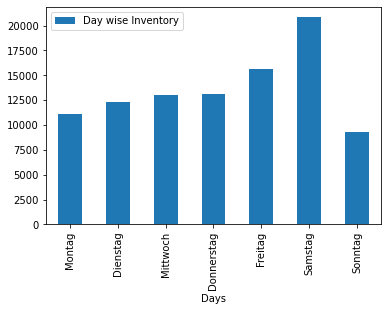

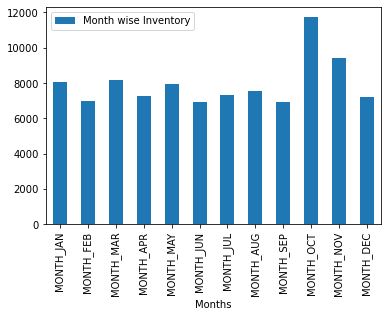

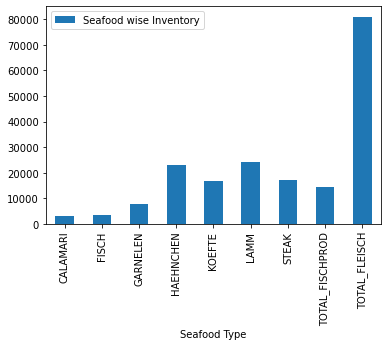

In [1]:
from Inventory_Environment_v1 import Env
import collections
import numpy as np
import random
import pickle
import os

import jproperties
from jproperties import Properties


from datetime import datetime
start_time = datetime.now()


### Create an empty Q-Dictionary if it does not exist:

In [2]:
m=50

In [3]:
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)
rewards_tracked = {(15,0):[],(25,1):[], (20,2): [], (30,3):[], (35,4):[], (10,5):[],(50,6):[]}

print(len(Q_dict))
print(len(rewards_tracked))
print(len(States_track))

0
7
0


### Import the latest dictionary if Q-Dictionary already exists:

In [4]:
if os.stat('Policy600000Episodes.pkl').st_size != 0:

    with open('Policy600000Episodes.pkl', 'rb') as handle:
        Q_dict = pickle.load(handle)
    
    with open('Rewards600000Episodes.pkl', 'rb') as handle:
        rewards_tracked = pickle.load(handle)    

    with open('States_tracked600000Episodes.pkl', 'rb') as handle:
        States_track = pickle.load(handle)    
    
    print(len(Q_dict))
    print(len(rewards_tracked))
    print(len(States_track))

In [5]:
#function to return valid actions

def valid_actions(state):
    
    state = int(state[0])
    valid_Actions = []
    
    for ix in range(0,m+1):
        valid_Actions.append(ix)
    return valid_Actions

In [6]:
#function to add Q-values to Q-dictionary

def add_to_dict(state,valid_act):
    
    if state not in Q_dict.keys():
        Q_dict[state] = {}
        for action in valid_act:
            Q_dict[state][action] = 0.0

In [7]:
#function to save Q-dictionary as a pickle file

def save_obj(obj, objname ):
    with open(objname + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [8]:
#function to initialise Q-values
def initialise_tracking_states():
    sample_q_values = [((15,0),12),((25,1),25),((20,2),10),((30,3),30),((35,4),15),((10,5),18),((50,6),10)]    #select any 4 Q-values
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []    #this is an array which will have appended values of that state-action pair for every 2000th episode         

In [9]:
#function to append latest Q-values of the 4 Q-values

def save_tracking_states():
    for st in States_track.keys():
        for action in States_track[st].keys():
            if st in Q_dict and action in Q_dict[st]:
                States_track[st][action].append(Q_dict[st][action])            

In [10]:
def epsilon_greedy(state, time):
    epsilon = - 1/ (1 + np.exp((-time+7600000)/1700000)) + 1
    z = np.random.random()
        
    if z > epsilon:
        action = max(Q_dict[state],key=Q_dict[state].get)   #Exploitation: this gets the action for max q-value of current state
    else:
        action = np.random.choice(np.arange(0,m+1))    #Exploration: randomly chose the action
    
    return action

### Training

In [11]:
#Parameters

# EPISODES = 1
EPISODES = 600000  #600000 Episodes for Convergence Analysis Testing
# STEPS = 1
STEPS = 30                 
LR = 0.01                   #learning rate
GAMMA = 0.91


threshold = 2000       # Q-values: stored/appended (convergence graphs)
#threshold = 1
policy_threshold = 30000    #every these many episodes, the Q-dict will be updated
#policy_threshold = 3

In [12]:
IsStore = "yes"
configs = Properties()
with open('keywords.properties', 'rb') as read_prop:
    configs.load(read_prop)
    
prop_view = configs.items()
for item in prop_view:
    if ((item[0]) == "IsStore"):
        IsStore = item[1].data

In [13]:
def training():
    for episode in range(0,EPISODES):
    
        env = Env()      #creating an instance of the class
        #this initialises the state and parameters to initial value for new episode
        
#         print("env.IsStore: ",env.IsStore)
#         print("IsStore: ",IsStore)
        if(env.IsStore == IsStore):
#             print("===============START====================")
#             print("Entered program after store check.........")
            initial_state = env.state    #tracking reward
            curr_state = env.state       #start is day's evening for action
            #curr_state is state_mon

#             print("DEBUG: curr_state post store check------------->: ",curr_state)
#             print("DEBUG: initial_state post store check---------->: ",initial_state)
            add_to_dict(curr_state,valid_actions(curr_state))

            #reward is not for the immediately next day
            time_step = 0
            reward = None
            curr_action = np.random.choice(np.arange(0,m+1))    #randomly choosing and action
                           
#             print("===============NEXT====================")    
#             print("DEBUG: curr_action after getting from random choice------------>: ",curr_action)
                
            next_state = env.initial_step(curr_state, curr_action)   #returned state_tue
            add_to_dict(next_state,valid_actions(next_state))
            
            curr_state = next_state       
            #note that curr_state is always earlier day evening's stock
            
            total_reward = 0
            
#             print("===============NEXT====================")    
#             print("DEBUG: after making next_state as curr_state. next_state obtained from initial_step------------>: ")
            
#             print("DEBUG: time_step----------------->:",time_step)
#             print("DEBUG: STEPS--------------------->:",STEPS)
#             print("DEBUG: next_state----------------->:",next_state)
#             print("DEBUG: curr_state----------------->:",curr_state)
#             print("DEBUG: before loop---------------->:")
            
            while time_step < STEPS:    #episode runs for a few steps

#                 print("===============NEXT====================")
#                 print("===============when time_step is less than STEPS====================")
#                 print("DEBUG: time_step----------------->:",time_step)
#                 print("DEBUG: STEPS----------------->:",STEPS)                
#                 print("DEBUG: curr_action----------------->:",curr_action)
#                 print("DEBUG: curr_state--------------------->:",curr_state)
#                 print("DEBUG: episode--------------------->:",episode)
                
                curr_action = epsilon_greedy(curr_state, episode)
                next_state, reward = env.step(curr_state, curr_action)
                add_to_dict(next_state,valid_actions(next_state))

                #update
                max_next = max(Q_dict[next_state],key=Q_dict[next_state].get)   #action corresponding to max q-value of next state
                Q_dict[curr_state][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state][max_next]))) - Q_dict[curr_state][curr_action] ) 


                curr_state = next_state
                total_reward += reward
                time_step += 1
                
#                 print("===============NEXT====================") 
                   

#                 print("DEBUG: curr_state----------------->:",curr_state)
#                 print("DEBUG: curr_action---------------->:",curr_action)
#                 print("DEBUG: episode-------------------->:",episode)    
#                 print("DEBUG: next_state--------------------->:",next_state)
#                 print("DEBUG: total_reward--------------------->:",total_reward)
#                 print("DEBUG: reward--------------------->:",reward)
#                 print("DEBUG: time_step--------------------->:",time_step)
#                 print("DEBUG: before tracking awards")                
                    

            #TRACKING REWARDS as per threshold levels
            if initial_state in rewards_tracked:
                rewards_tracked[initial_state].append(total_reward)
                save_obj(rewards_tracked,'Rewards600000Episodes')

            if ((episode+1) % threshold) == 0:
                save_obj(rewards_tracked,'Rewards600000Episodes')   

            #TRACKING Q-VALUES
            if (episode == threshold-1):
                initialise_tracking_states()

            if ((episode+1) % threshold) == 0:
                save_tracking_states()
                save_obj(States_track,'States_tracked600000Episodes')   

            #SAVING POLICY
            if ((episode+1)% policy_threshold ) == 0:  #every 30000th episodes, the Q-dict will be saved
                save_obj(Q_dict,'PolicyNew')    
    return episode, total_reward

save_obj(rewards_tracked,'Rewards600000Episodes')   
save_obj(States_track,'States_tracked600000Episodes')   
save_obj(Q_dict,'Policy600000Episodes')

In [14]:
# Training
training()

(599999, -1882.9950000000003)

In [15]:
save_obj(rewards_tracked,'Rewards600000Episodes')   
save_obj(States_track,'States_tracked600000Episodes')   
save_obj(Q_dict,'Policy600000Episodes')      

### Checking Values

In [16]:
Q_dict

defaultdict(dict,
            {(34, 0): {0: -283.57921901969314,
              1: -284.7988166235768,
              2: -285.9390849940876,
              3: -285.4166971163618,
              4: -285.35682799524835,
              5: -282.3625774018279,
              6: -284.15063964278835,
              7: -282.32462680179316,
              8: -279.50399059455174,
              9: -278.1521407365699,
              10: -279.94089041547164,
              11: -282.22947156983685,
              12: -279.63242857390617,
              13: -278.6071865136705,
              14: -280.4749266051921,
              15: -277.0882953489499,
              16: -278.08406969389745,
              17: -278.2601615382858,
              18: -275.3954579779692,
              19: -276.30648314474433,
              20: -279.2222894093242,
              21: -273.9544143720236,
              22: -277.2111971457476,
              23: -272.1346628136443,
              24: -270.99311980683376,
              25: -273

In [17]:
States_track

defaultdict(dict,
            {(15,
              0): {12: [-0.5653750000000001,
               -1.6965814280320013,
               -2.257829254800414,
               -5.009877055113855,
               -8.213078976224622,
               -9.259673447094793,
               -10.325127436624186,
               -11.907237841093798,
               -13.473274542061839,
               -14.507270860401043,
               -15.55406897621864,
               -17.152351837612795,
               -18.718706267818245,
               -19.239307374480894,
               -20.831089998759083,
               -22.43498171761804,
               -24.565337785813504,
               -25.62472209083272,
               -27.214813440681105,
               -29.339056280313276,
               -29.339056280313276,
               -30.399417258195356,
               -31.494901405557986,
               -35.76516327763448,
               -38.3351213013993,
               -42.69376631360218,
               -44.61182222054

In [18]:
rewards_tracked[(10,5)][-10:]

[-1735.7150000000004,
 -1854.585,
 -1876.64,
 -1839.7224999999999,
 -1734.785,
 -2022.435,
 -1785.8574999999998,
 -1517.09,
 -1773.7874999999997,
 -1732.0049999999997]

In [19]:
rewards_tracked[(10,5)][0:10]

[-1702.0099999999998,
 -1711.105,
 -1766.86,
 -1861.6974999999995,
 -2100.41,
 -1792.9325,
 -1647.0350000000003,
 -1654.2075000000002,
 -1750.1725000000001,
 -1872.54]

In [20]:
rewards_tracked

{(15, 0): [-1791.4325,
  -1871.325,
  -1820.2425,
  -1782.0900000000001,
  -1693.56,
  -1807.3950000000002,
  -1641.5374999999995,
  -1722.375,
  -1633.3899999999999,
  -1811.8925,
  -1583.395,
  -1905.3799999999999,
  -1496.7124999999999,
  -1765.28,
  -1718.1775,
  -1744.4099999999999,
  -1854.5150000000003,
  -1880.38,
  -1643.7224999999999,
  -1694.3850000000004,
  -1936.0425000000005,
  -1950.865,
  -1817.42,
  -1930.2175000000002,
  -1586.4950000000001,
  -1813.4875,
  -1712.4900000000002,
  -1706.3475000000005,
  -1726.605,
  -1667.4925,
  -1609.7275000000002,
  -1610.6174999999998,
  -1739.7350000000004,
  -1800.3124999999998,
  -1570.655,
  -1907.3749999999993,
  -1743.0074999999997,
  -1889.2824999999998,
  -1646.3749999999995,
  -1709.4275000000002,
  -1557.7275000000002,
  -1804.31,
  -1778.4074999999996,
  -1716.4950000000001,
  -1944.3225,
  -1555.5125,
  -1998.9450000000006,
  -1752.2025000000003,
  -1743.2125,
  -1892.9975000000004,
  -1421.8100000000002,
  -2100.902500

### Memory requirements

In [21]:
#No. of state,action pairs
state_space = 51*51*7
print(state_space)

18207


In [22]:
#4 q-values in tracking and saved as per threshold levels

no_of_q_values_tracked = 4*20000000/20000
print(no_of_q_values_tracked)


4000.0


In [23]:
# testing Q dictionary
Q_dict[(50,2)]

{0: -204.97817514840568,
 1: -208.4310787982606,
 2: -207.33235589124337,
 3: -207.12097543629952,
 4: -207.15330055309664,
 5: -203.47665968176307,
 6: -205.4113977684136,
 7: -206.47735997381994,
 8: -204.22789248246423,
 9: -202.11086129045313,
 10: -202.93832652818946,
 11: -201.6359820469494,
 12: -201.94912960636884,
 13: -200.4799945726643,
 14: -198.34190801992085,
 15: -201.9689910516149,
 16: -201.0277348894327,
 17: -199.27921873235016,
 18: -195.90130565522352,
 19: -197.94416722812474,
 20: -195.85840940160625,
 21: -196.36391237800095,
 22: -197.1472704376932,
 23: -196.41395203731102,
 24: -194.4176215495078,
 25: -194.87362024989125,
 26: -193.57599646518491,
 27: -193.00186421990423,
 28: -193.87463356221437,
 29: -190.64332245077733,
 30: -190.619505970523,
 31: -192.07654703705194,
 32: -192.60144826393858,
 33: -189.87932482588525,
 34: -190.92177744554726,
 35: -189.65910843244762,
 36: -187.26570606412943,
 37: -190.2373939610277,
 38: -188.20382017660336,
 39: -1

In [24]:
# determining re-order levels as per inventory size
for x in range(0, 51):
    print(x, ':', max(Q_dict[(x,0)],key=Q_dict[(x,0)].get))

0 : 44
1 : 45
2 : 45
3 : 49
4 : 50
5 : 46
6 : 50
7 : 49
8 : 47
9 : 46
10 : 47
11 : 46
12 : 46
13 : 47
14 : 50
15 : 49
16 : 49
17 : 45
18 : 47
19 : 41
20 : 50
21 : 50
22 : 50
23 : 47
24 : 49
25 : 49
26 : 49
27 : 50
28 : 42
29 : 43
30 : 39
31 : 49
32 : 47
33 : 46
34 : 46
35 : 46
36 : 44
37 : 49
38 : 48
39 : 48
40 : 47
41 : 45
42 : 45
43 : 49
44 : 47
45 : 49
46 : 43
47 : 46
48 : 44
49 : 47
50 : 37


In [25]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:27:56.398035
